In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [ ]:
from pathlib import Path
import pandas as pd

In [ ]:
#import data sets
data = Path('/content/Bitcoin_10_17_2023-10_16_2024_historical_data_coinmarketcap.csv')
Bit_df = pd.read_csv(data, delimiter= ';')
Bit_df['timestamp'] = pd.to_datetime(Bit_df['timestamp'])
Bit_df_clean = Bit_df[['close', 'volume', 'marketCap', 'timestamp']]
df_b = Bit_df_clean.sort_values(by='timestamp', ascending=True)
df_b.head()

,close,volume,marketCap,timestamp
363,28328.341152,1.272413e+10,5.529012e+11,2023-10-18 23:59:59.999000+00:00
362,28719.806133,1.444806e+10,5.605684e+11,2023-10-19 23:59:59.999000+00:00
361,29682.949274,2.153613e+10,5.793921e+11,2023-10-20 23:59:59.999000+00:00
360,29918.411668,1.154115e+10,5.840152e+11,2023-10-21 23:59:59.999000+00:00
359,29993.896524,1.044652e+10,5.855174e+11,2023-10-22 23:59:59.999000+00:00


In [ ]:
data = Path('/content/total_bitcoin.csv')
Bit_df = pd.read_csv(data, delimiter= ',')
Bit_df.head()

,Date,Close,Volume
0,9/18/2014,424.440002,34483200.0
1,9/19/2014,394.795990,37919700.0
2,9/20/2014,408.903992,36863600.0
3,9/21/2014,398.821014,26580100.0
4,9/22/2014,402.152008,24127600.0


In [ ]:
## Let us only focus on the 'Close' column
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df_bit = Bit_df[['Close']]

#results = seasonal_decompose(df_bit)
#results.plot()

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

train_size = int(len(df_bit)*0.8)
train  , test = df_bit[:train_size] , df_bit[train_size:]
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

n_input = 100
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy"])

# fit model
model.fit(generator,epochs = 10 ,batch_size = 50)

Epoch 1/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 167s 58ms/step - accuracy: 6.2973e-05 - loss: 35.7178
Epoch 2/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 159s 56ms/step - accuracy: 0.0012 - loss: 5.8574e-04
Epoch 3/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 166s 58ms/step - accuracy: 6.5434e-04 - loss: 4.2687e-04
Epoch 4/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 162s 57ms/step - accuracy: 0.0012 - loss: 3.9230e-04
Epoch 5/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 166s 58ms/step - accuracy: 3.9688e-04 - loss: 3.3706e-04
Epoch 6/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 203s 59ms/step - accuracy: 8.2860e-04 - loss: 2.6732e-04
Epoch 7/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 165s 58ms/step - accuracy: 2.0612e-04 - loss: 2.5775e-04
Epoch 8/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 163s 57ms/step - accuracy: 7.6464e-04 - loss: 2.4290e-04
Epoch 9/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 166s 58ms/step - accuracy: 0.0010 - loss: 2.1338e-04
Epoch 10/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 162s 57ms/step - accuracy: 6.5471e-04 - loss: 2.1772e-04


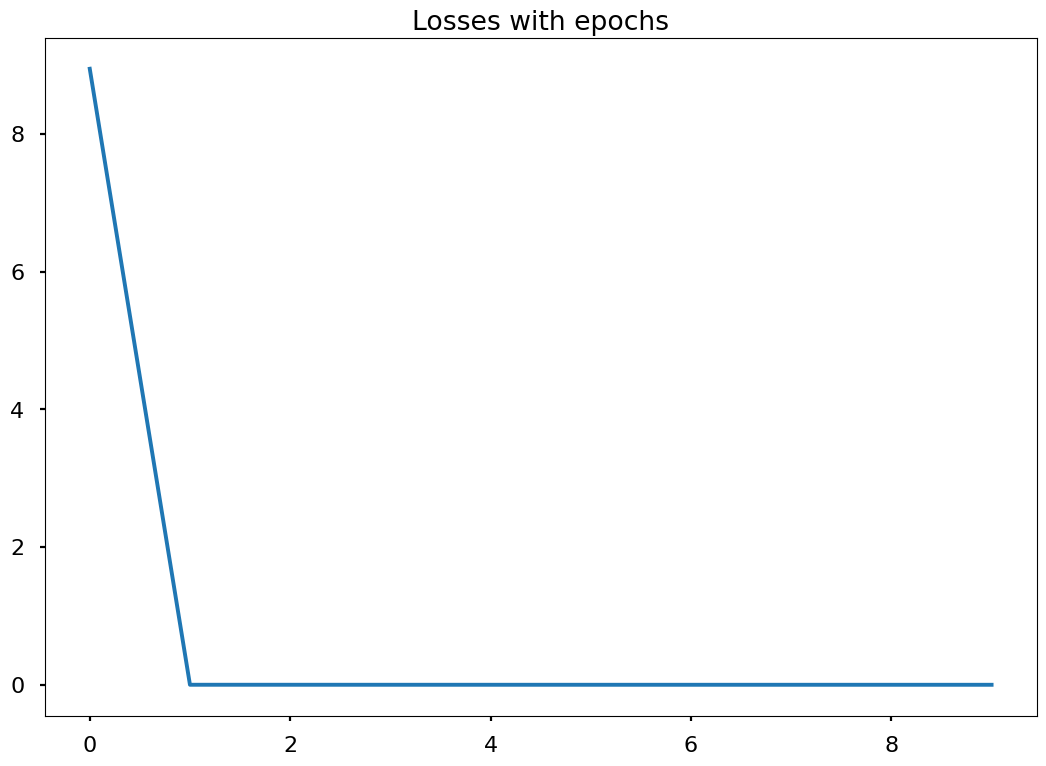

In [ ]:
plt.title('Losses with epochs')
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
test1 = test.values

In [ ]:
# Reshape the test data for predictions
#X_test = X_test.reshape((X_test.shape[0], time_steps, 1))

# Generate predictions
predictions = model.predict(scaled_test)

# Inverse transform the predictions to get the original scale
predictions = scaler.inverse_transform(predictions)

#y_test = y_test.reshape(-1,1)
#y_test = mmc.inverse_transform(y_test)

# Print some predictions
for i in range(min(10, len(predictions))):
    print("True: {:.2f}    Predicted: {:.2f}".format(test1[i][0] , predictions[i][0]))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
True: 19141.48    Predicted: 17264.15
True: 19051.42    Predicted: 17201.06
True: 19157.45    Predicted: 17275.34
True: 19382.90    Predicted: 17433.50
True: 19185.66    Predicted: 17295.11
True: 19067.63    Predicted: 17212.42
True: 19268.09    Predicted: 17352.92
True: 19550.76    Predicted: 17550.97
True: 19334.42    Predicted: 17399.46
True: 19139.54    Predicted: 17262.79


In [ ]:
y_test = pd.DataFrame(test1)
y_test.rename(columns = {0:'Actual'},inplace = True)
predictions = pd.DataFrame(predictions)
predictions.rename(columns = {0:'Predicted'},inplace = True)
df = pd.concat([y_test,predictions],axis = 1)
df.head()

,Actual,Predicted
0,19141.48438,17264.152344
1,19051.41797,17201.064453
2,19157.44531,17275.339844
3,19382.90430,17433.503906
4,19185.65625,17295.113281


Text(0.5, 1.0, 'Bitcoin prediction')

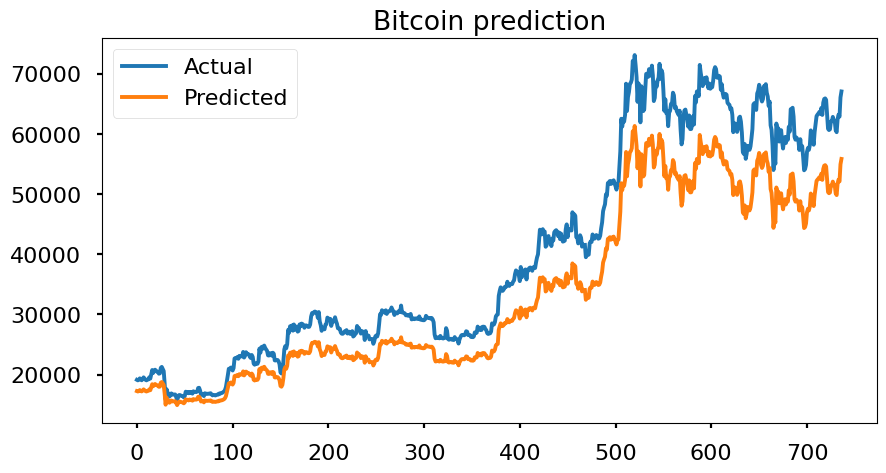

In [ ]:
df.plot(figsize = (10,5))
plt.title('Bitcoin prediction')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


# define model
model = Sequential()
model.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, activation='tanh')) # Last LSTM layer should not return sequences by default
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Assuming that `generator` is created properly with the corresponding `batch_size`
# fit model
model.fit(generator, epochs=12)

Epoch 1/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - loss: 0.0354
Epoch 2/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - loss: 0.0059
Epoch 3/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 108ms/step - loss: 0.0065
Epoch 4/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - loss: 0.0044
Epoch 5/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - loss: 0.0055
Epoch 6/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - loss: 0.0043
Epoch 7/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - loss: 0.0032
Epoch 8/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - loss: 0.0026
Epoch 9/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - loss: 0.0027
Epoch 10/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - loss: 0.0031
Epoch 11/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - loss: 0.0022
Epoch 12/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - loss: 0.0030


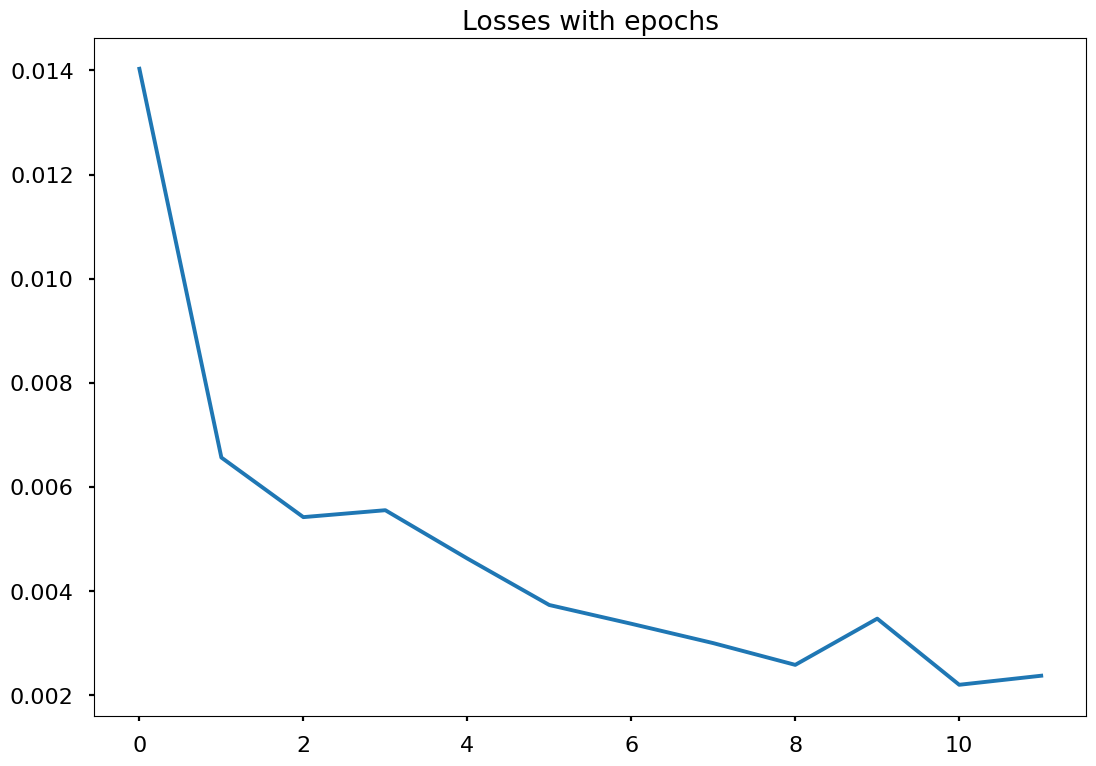

In [ ]:
plt.title('Losses with epochs')
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
predictions = model.predict(scaled_test)

# Inverse transform the predictions to get the original scale
predictions = scaler.inverse_transform(predictions)

# Print some predictions
for i in range(min(10, len(predictions))):
    print("True: {:.2f}    Predicted: {:.2f}".format(test1[i][0] , predictions[i][0]))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step
True: 58116.98    Predicted: 36461.39
True: 53991.46    Predicted: 35237.33
True: 56034.32    Predicted: 35837.10
True: 55027.46    Predicted: 35539.94
True: 61710.14    Predicted: 37568.97
True: 60880.11    Predicted: 37309.68
True: 60945.81    Predicted: 37330.14
True: 58719.48    Predicted: 36644.41
True: 59354.51    Predicted: 36838.49
True: 60609.57    Predicted: 37225.62


Text(0.5, 1.0, 'Bitcoin prediction with deeper LSTM')

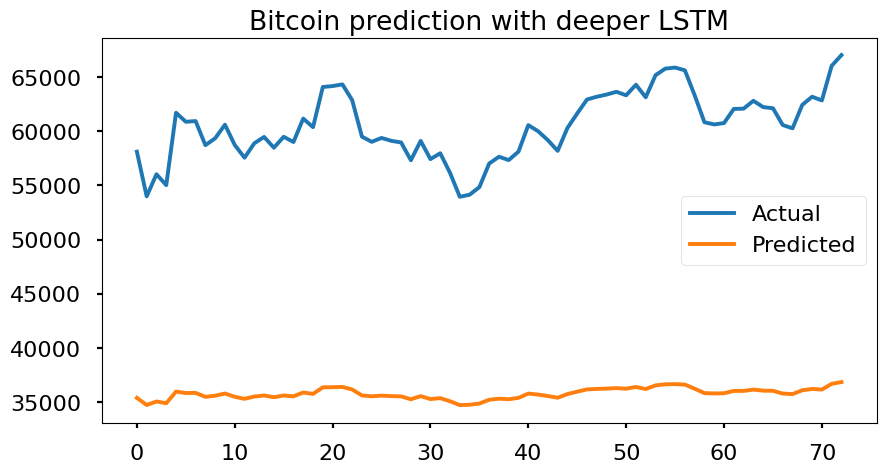

In [ ]:
df.plot(figsize = (10,5))
plt.title('Bitcoin prediction with deeper LSTM')

In [ ]:
data = Path('/content/total_Ethcoin.csv')
df_e = pd.read_csv(data, delimiter= ',')
df_e.head()

,Date,Close,Volume
0,11/10/2017,299.252991,885985984
1,11/11/2017,314.681000,842300992
2,11/12/2017,307.907990,1613479936
3,11/13/2017,316.716003,1041889984
4,11/14/2017,337.631012,1069680000


In [ ]:
# Let us try the above steps for Etherium

df_eth = df_e[['Close']]

#results = seasonal_decompose(df_eth)
#results.plot()

In [ ]:
scaler = MinMaxScaler()


#Let us now split the data into training and test sets
train_size = int(len(df_eth) * 0.8)
train_data , test_data = df_eth[:train_size]  , df_eth[train_size:]

scaled_train = scaler.fit_transform(train_data)
scaled_test = scaler.transform(test_data)
n_input = 100
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

# Let us have the same dense model as above
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(generator,epochs = 10 ,batch_size = 50)

Epoch 1/10
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 114s 59ms/step - loss: 0.0055
Epoch 2/10
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 139s 57ms/step - loss: 7.9948e-04
Epoch 3/10
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 110s 57ms/step - loss: 6.0388e-04
Epoch 4/10
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 110s 57ms/step - loss: 5.2119e-04
Epoch 5/10
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 112s 58ms/step - loss: 5.3016e-04
Epoch 6/10
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 110s 57ms/step - loss: 4.5891e-04
Epoch 7/10
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 114s 59ms/step - loss: 4.3476e-04
Epoch 8/10
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 113s 59ms/step - loss: 3.6010e-04
Epoch 9/10
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 142s 59ms/step - loss: 3.9489e-04
Epoch 10/10
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 138s 57ms/step - loss: 4.3087e-04


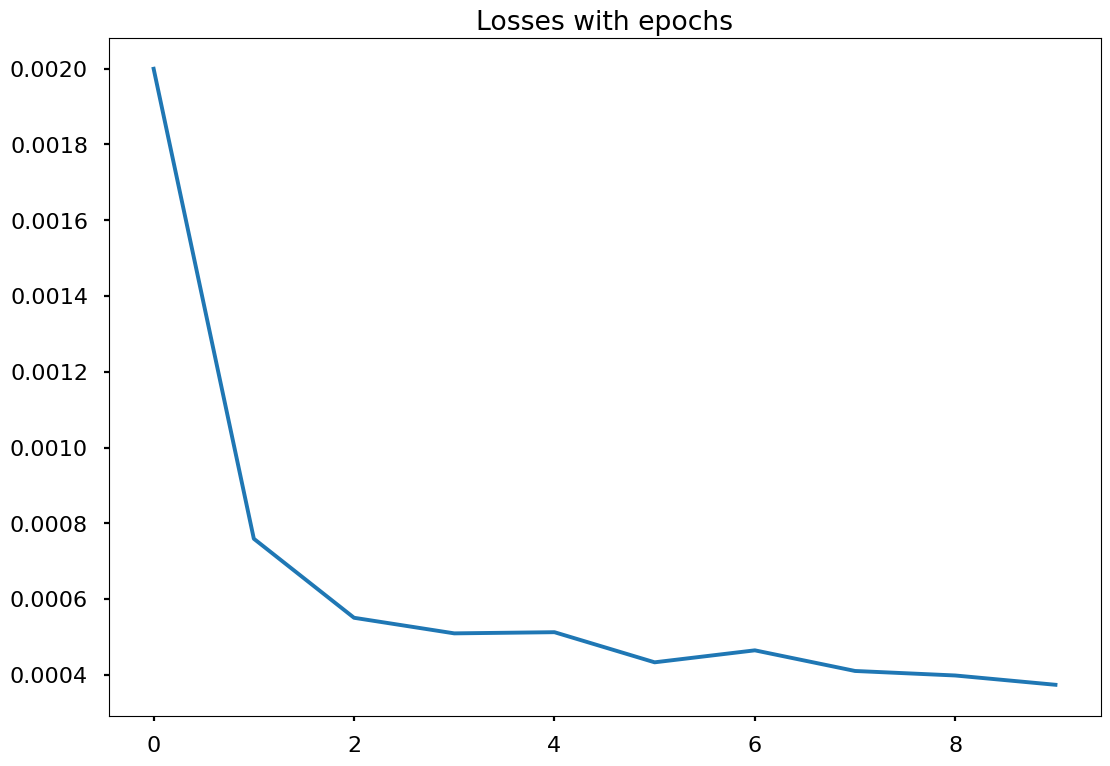

In [ ]:
plt.title('Losses with epochs')
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
test1 = test_data.values
# Generate predictions
predictions = model.predict(scaled_test)

# Inverse transform the predictions to get the original scale
predictions = scaler.inverse_transform(predictions)

# Print some predictions
for i in range(min(10, len(predictions))):
    print("True: {:.2f}    Predicted: {:.2f}".format(test1[i][0] , predictions[i][0]))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
True: 1910.91    Predicted: 1365.85
True: 1893.08    Predicted: 1355.48
True: 1901.03    Predicted: 1360.10
True: 1874.13    Predicted: 1344.48
True: 1862.20    Predicted: 1337.56
True: 1907.26    Predicted: 1363.72
True: 1892.41    Predicted: 1355.09
True: 1890.51    Predicted: 1353.99
True: 1811.83    Predicted: 1308.44
True: 1884.49    Predicted: 1350.49


In [ ]:
y_test = pd.DataFrame(y_test)
y_test.rename(columns = {0:'Actual'},inplace = True)
predictions = pd.DataFrame(predictions)
predictions.rename(columns = {0:'Predicted'},inplace = True)
df = pd.concat([y_test,predictions],axis = 1)
df.head()

,Actual,Predicted
0,19141.48438,1365.846558
1,19051.41797,1355.476440
2,19157.44531,1360.095825
3,19382.90430,1344.477539
4,19185.65625,1337.562256


Text(0.5, 1.0, 'Etherium prediction with a shallow LSTM')

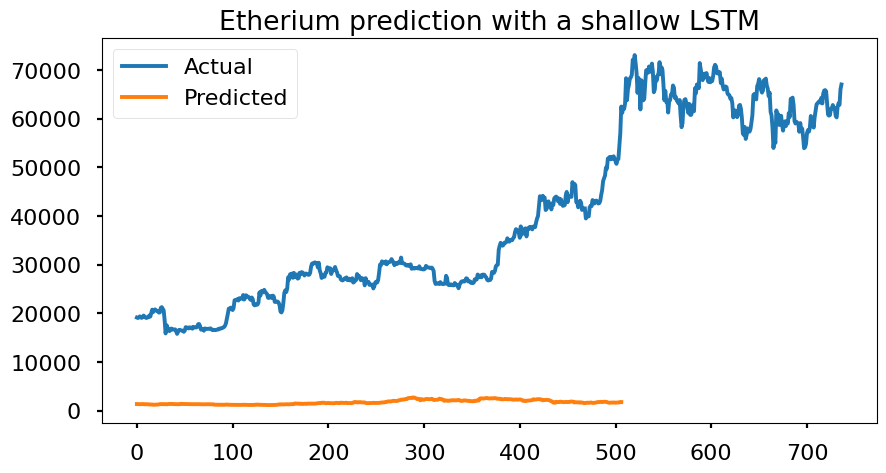

In [ ]:
df.plot(figsize = (10,5))
plt.title('Etherium prediction with a shallow LSTM')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


# define model
model = Sequential()
model.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, activation='tanh')) # Last LSTM layer should not return sequences by default
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Assuming that `generator` is created properly with the corresponding `batch_size`
# fit model
model.fit(generator, epochs=12)

Epoch 1/12
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 207s 105ms/step - loss: 0.0034
Epoch 2/12
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 201s 105ms/step - loss: 8.6814e-04
Epoch 3/12
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 199s 104ms/step - loss: 7.4805e-04
Epoch 4/12
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 203s 104ms/step - loss: 5.0211e-04
Epoch 5/12
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 201s 104ms/step - loss: 4.8958e-04
Epoch 6/12
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 201s 105ms/step - loss: 5.0748e-04
Epoch 7/12
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 202s 105ms/step - loss: 4.5540e-04
Epoch 8/12
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 202s 105ms/step - loss: 5.2200e-04
Epoch 9/12
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 203s 105ms/step - loss: 3.7285e-04
Epoch 10/12
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 202s 105ms/step - loss: 4.6859e-04
Epoch 11/12
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 261s 105ms/step - loss: 3.9166e-04
Epoch 12/12
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 202s 105ms/step - loss: 3.9050e-04


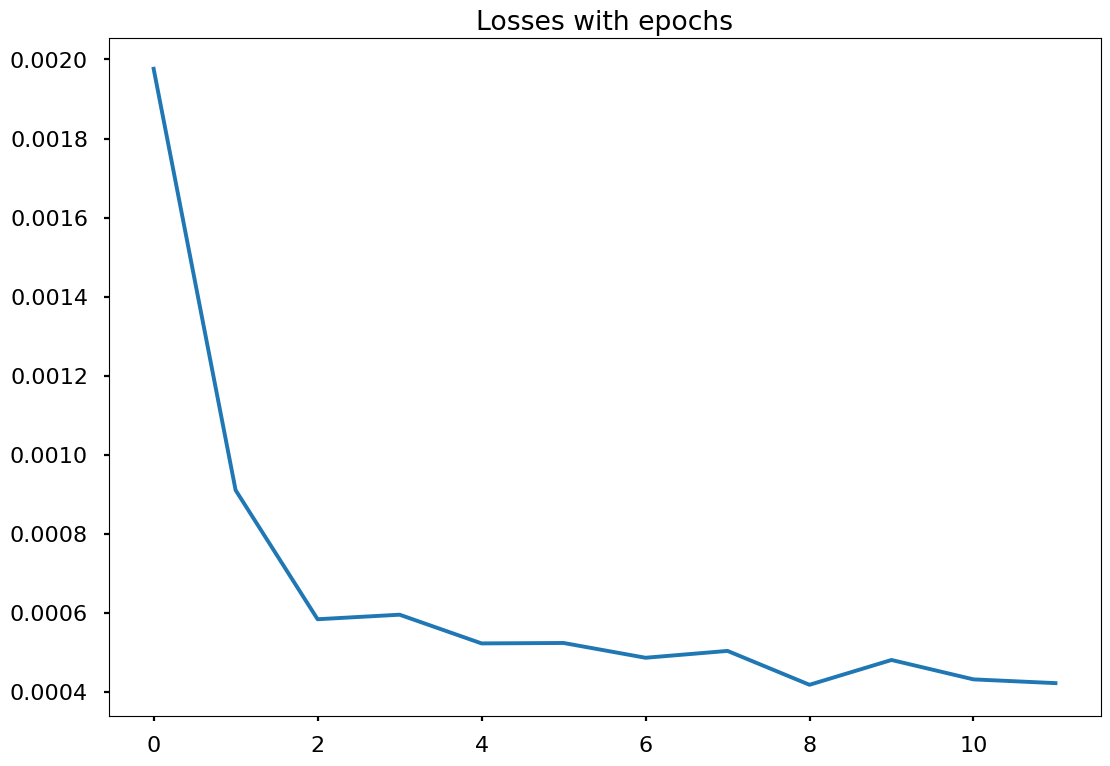

In [ ]:
plt.title('Losses with epochs')
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
test1 = test_data.values
# Generate predictions
predictions = model.predict(scaled_test)


predictions = scaler.inverse_transform(predictions)


# Print some predictions
for i in range(min(10, len(predictions))):
    print("True: {:.2f}    Predicted: {:.2f}".format(test1[i][0] , predictions[i][0]))

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
True: 1910.91    Predicted: 1679.64
True: 1893.08    Predicted: 1662.90
True: 1901.03    Predicted: 1670.36
True: 1874.13    Predicted: 1645.13
True: 1862.20    Predicted: 1633.96
True: 1907.26    Predicted: 1676.21
True: 1892.41    Predicted: 1662.27
True: 1890.51    Predicted: 1660.49
True: 1811.83    Predicted: 1586.87
True: 1884.49    Predicted: 1654.85


In [ ]:
y_test = pd.DataFrame(test1)
y_test.rename(columns = {0:'Actual'},inplace = True)
predictions = pd.DataFrame(predictions)
predictions.rename(columns = {0:'Predicted'},inplace = True)
df = pd.concat([y_test,predictions],axis = 1)
df.head()

,Actual,Predicted
0,1910.914185,1679.641968
1,1893.078125,1662.898071
2,1901.026611,1670.357666
3,1874.130493,1645.131226
4,1862.201416,1633.956665


Text(0.5, 1.0, 'Etherium prediction with a deep LSTM')

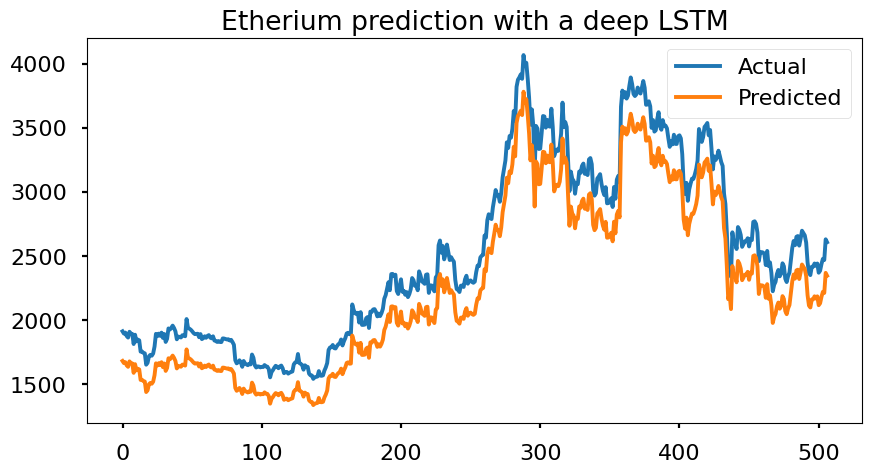

In [ ]:
df.plot(figsize = (10,5))
plt.title('Etherium prediction with a deep LSTM')